# import libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import iqr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load Dataset

In [55]:
train_data=pd.read_csv(r'D:\FCDS\Digital Egypt Pioneers Initiative(DEPI)\datasets\employee attrition\employee_attrition_train.csv')
test_data=pd.read_csv(r'D:\FCDS\Digital Egypt Pioneers Initiative(DEPI)\datasets\employee attrition\employee_attrition_test.csv')

# Explore Dataset

In [57]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [58]:
test_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,...,4,80,0,16,3,4,13,11,3,7


In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       386 non-null    float64
 1   BusinessTravel            436 non-null    object 
 2   DailyRate                 427 non-null    float64
 3   Department                441 non-null    object 
 4   DistanceFromHome          387 non-null    float64
 5   Education                 441 non-null    int64  
 6   EducationField            441 non-null    object 
 7   EmployeeCount             441 non-null    int64  
 8   EmployeeNumber            441 non-null    int64  
 9   EnvironmentSatisfaction   441 non-null    int64  
 10  Gender                    441 non-null    object 
 11  HourlyRate                441 non-null    int64  
 12  JobInvolvement            441 non-null    int64  
 13  JobLevel                  441 non-null    int64  
 14  JobRole   

In [61]:
# تلخيص القيم المفقودة وأنواع البيانات والقيم الفريدة
eda_summary = {
    "Column": train_data.columns,
    "Missing Values": train_data.isnull().sum().values,
    "Data Type": train_data.dtypes.values,
    "Unique Values": train_data.nunique().values
}
train_eda_df = pd.DataFrame(eda_summary)

# وصف إحصائي للبيانات العددية
train_numeric_description = train_data.describe(include='number')

# وصف الأعمدة النوعية
train_categorical_description = train_data.describe(include='object')

print(train_eda_df)

                      Column  Missing Values Data Type  Unique Values
0                        Age             136   float64             39
1                  Attrition               0    object              2
2             BusinessTravel               5    object              3
3                  DailyRate              27   float64            692
4                 Department               0    object              3
5           DistanceFromHome              95   float64             27
6                  Education               0     int64              5
7             EducationField               0    object              6
8              EmployeeCount               0     int64              1
9             EmployeeNumber               0     int64           1029
10   EnvironmentSatisfaction               0     int64              4
11                    Gender               0    object              2
12                HourlyRate               0     int64             71
13            JobInv

In [62]:
# تلخيص القيم المفقودة وأنواع البيانات والقيم الفريدة
eda_summary_test = {
    "Column": test_data.columns,
    "Missing Values": test_data.isnull().sum().values,
    "Data Type": test_data.dtypes.values,
    "Unique Values": test_data.nunique().values
}
test_eda_df = pd.DataFrame(eda_summary_test)

# وصف إحصائي للبيانات العددية
test_numeric_description = test_data.describe(include='number')

# وصف الأعمدة النوعية
test_categorical_description = test_data.describe(include='object')

print(test_eda_df)

                      Column  Missing Values Data Type  Unique Values
0                        Age              55   float64             39
1             BusinessTravel               5    object              3
2                  DailyRate              14   float64            368
3                 Department               0    object              3
4           DistanceFromHome              54   float64             27
5                  Education               0     int64              5
6             EducationField               0    object              6
7              EmployeeCount               0     int64              1
8             EmployeeNumber               0     int64            441
9    EnvironmentSatisfaction               0     int64              4
10                    Gender               0    object              2
11                HourlyRate               0     int64             71
12            JobInvolvement               0     int64              4
13                  

In [63]:
train_numeric_description

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,...,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,...,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [64]:
test_numeric_description

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,386.000000,427.000000,387.000000,441.000000,441.0,441.000000,441.000000,441.000000,441.000000,441.000000,...,441.000000,441.0,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,38.000000,800.960187,9.459948,2.961451,1.0,1026.027211,2.811791,64.049887,2.768707,2.111111,...,2.764172,80.0,0.727891,11.473923,2.839002,2.791383,7.160998,4.260771,2.346939,4.396825
std,8.832055,395.674732,8.123102,0.951488,0.0,592.604321,1.080171,19.889176,0.714156,1.078251,...,1.088654,0.0,0.793936,7.603819,1.303465,0.727398,6.264541,3.542922,3.471939,3.661705
min,18.000000,104.000000,1.000000,1.000000,1.0,14.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,466.000000,2.000000,2.000000,1.0,485.000000,2.000000,47.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,796.000000,8.000000,3.000000,1.0,1024.000000,3.000000,63.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1142.500000,15.000000,4.000000,1.0,1557.000000,4.000000,81.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [65]:
train_categorical_description

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1029,1024,1029,1029,1029,1029,1024,1029,1029
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,853,723,676,426,617,217,474,1029,731


In [66]:
test_categorical_description

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,436,441,441,441,441,438,441,441
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,311,285,180,265,109,193,441,323


In [67]:
duplicates_train=train_data.duplicated().sum()
duplicates_train

0

In [68]:
duplicates_test=test_data.duplicated().sum()
duplicates_test

0

#  potential relationships between features and employee attrition

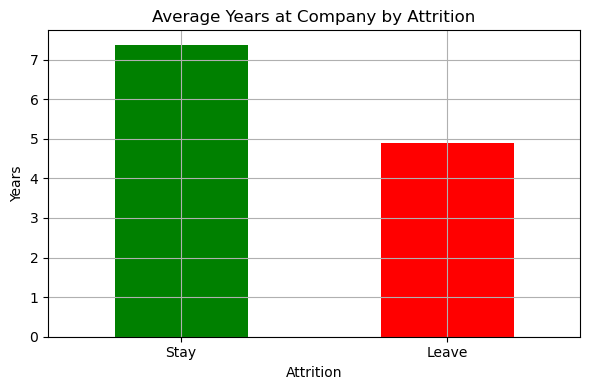

In [70]:
# Average tenure by attrition
plt.figure(figsize=(6, 4))
train_data.groupby('Attrition')['YearsAtCompany'].mean().plot(kind='bar', color=['green', 'red'])
plt.title("Average Years at Company by Attrition")
plt.ylabel("Years")
plt.xticks(ticks=[0,1], labels=['Stay','Leave'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

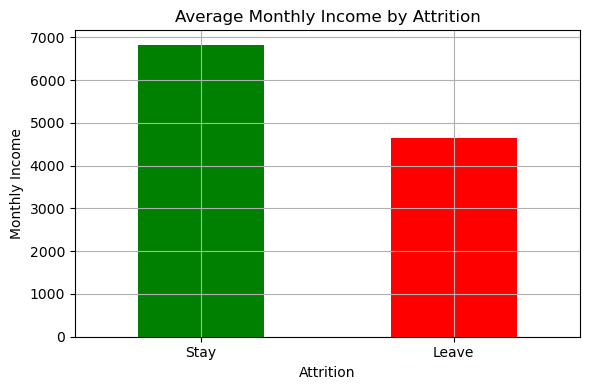

In [71]:
# Average income by attrition
plt.figure(figsize=(6, 4))
train_data.groupby('Attrition')['MonthlyIncome'].mean().plot(kind='bar', color=['green', 'red'])
plt.title("Average Monthly Income by Attrition")
plt.ylabel("Monthly Income")
plt.xticks(ticks=[0,1], labels=['Stay','Leave'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

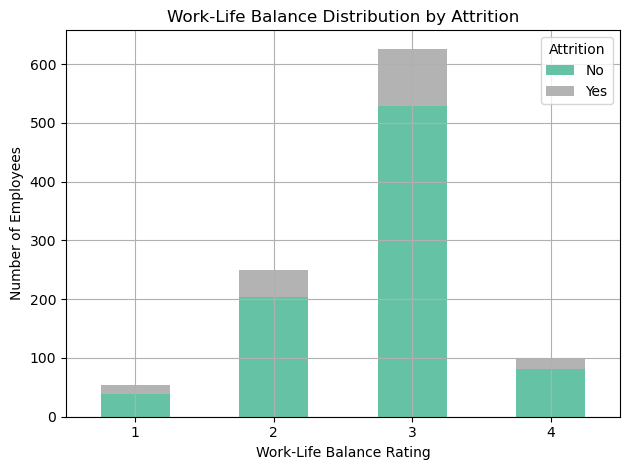

In [72]:
# Work-life balance count by attrition
plt.figure(figsize=(8, 5))
worklife_counts = train_data.groupby(['WorkLifeBalance', 'Attrition']).size().unstack()
worklife_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Work-Life Balance Distribution by Attrition")
plt.ylabel("Number of Employees")
plt.xlabel("Work-Life Balance Rating")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

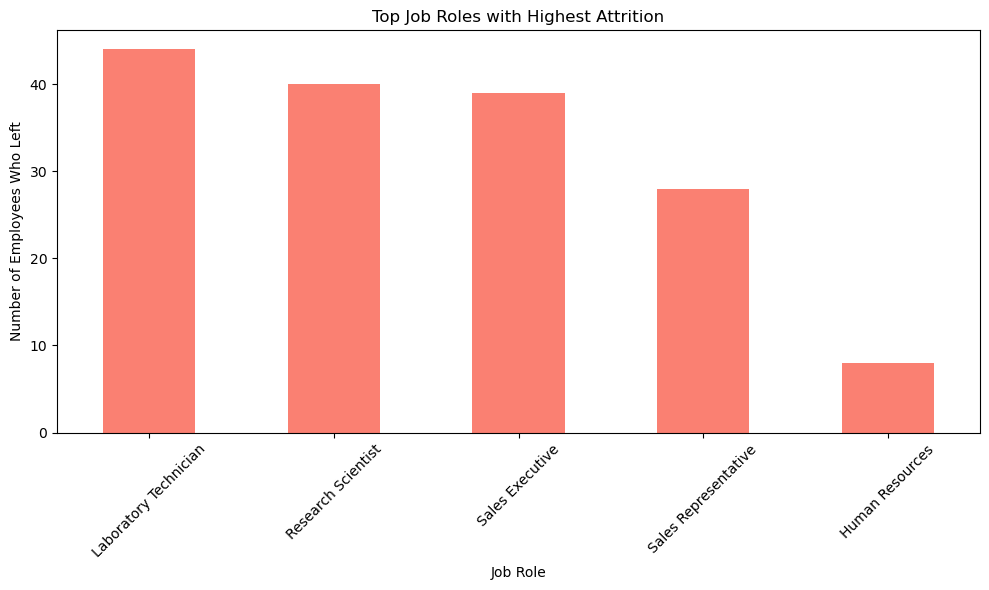

In [73]:
# Filter employees who left (Attrition == 'Yes')
left_employees = train_data[train_data['Attrition'] == 'Yes']

top_roles = left_employees['JobRole'].value_counts().head()
plt.figure(figsize=(10, 6))
top_roles.plot(kind='bar', color='salmon')
plt.title('Top Job Roles with Highest Attrition')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

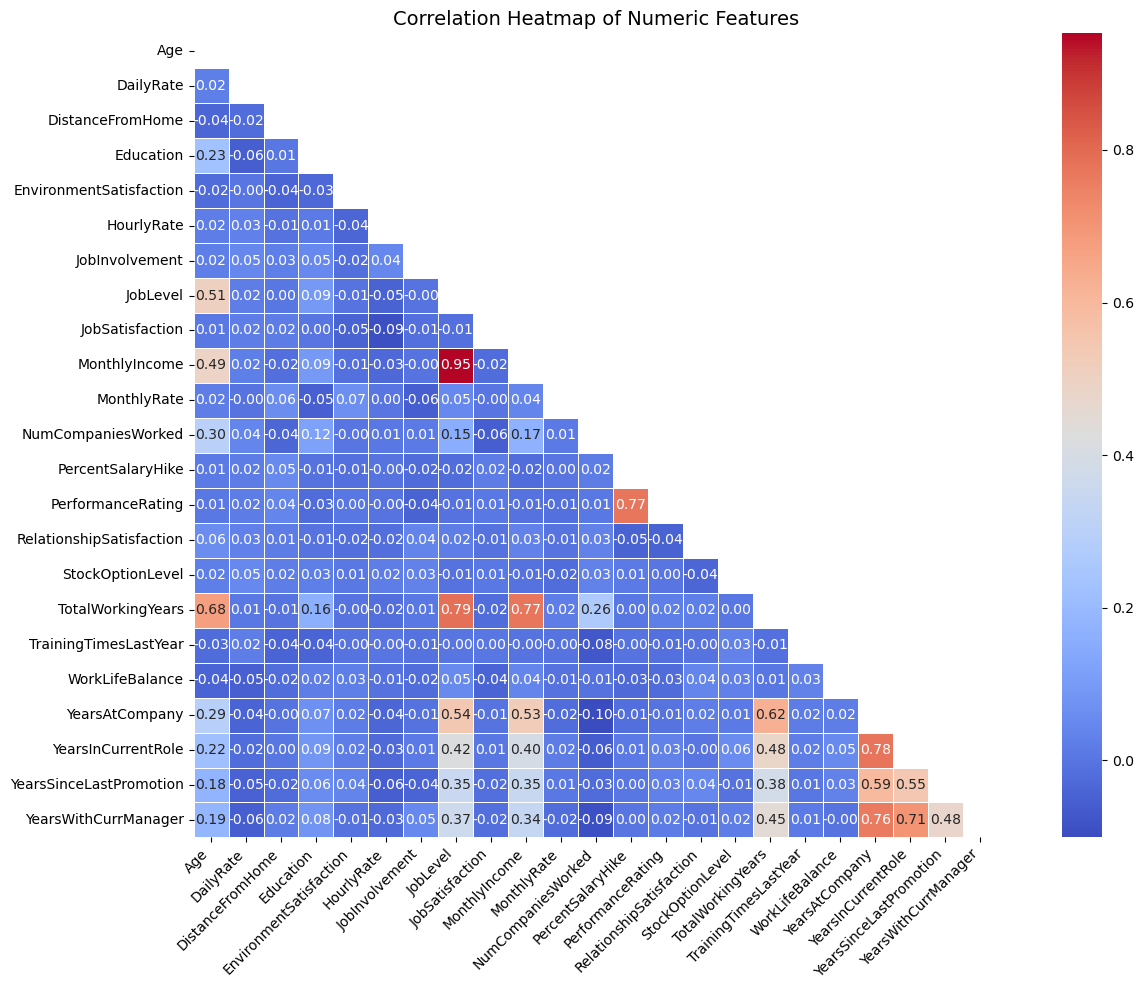

In [74]:
# Correlation Heatmap (clean and focused)
plt.figure(figsize=(14, 10))
corr = train_data.select_dtypes(include=['int64', 'float64']).drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [75]:
# Top 10 most correlated feature pairs (excluding self-correlation)
corr_unstacked = corr.abs().unstack()
corr_filtered = corr_unstacked[corr_unstacked < 1.0]  # exclude perfect correlation
strongest_corr = corr_filtered.sort_values(ascending=False).drop_duplicates().head(10)

print("\nTop 10 strongest correlations between numeric features:")
print(strongest_corr)


Top 10 strongest correlations between numeric features:
JobLevel                 MonthlyIncome         0.952756
                         TotalWorkingYears     0.786130
YearsAtCompany           YearsInCurrentRole    0.777925
PerformanceRating        PercentSalaryHike     0.774110
TotalWorkingYears        MonthlyIncome         0.773499
YearsWithCurrManager     YearsAtCompany        0.759755
                         YearsInCurrentRole    0.705717
TotalWorkingYears        Age                   0.676650
YearsAtCompany           TotalWorkingYears     0.624096
YearsSinceLastPromotion  YearsAtCompany        0.592912
dtype: float64


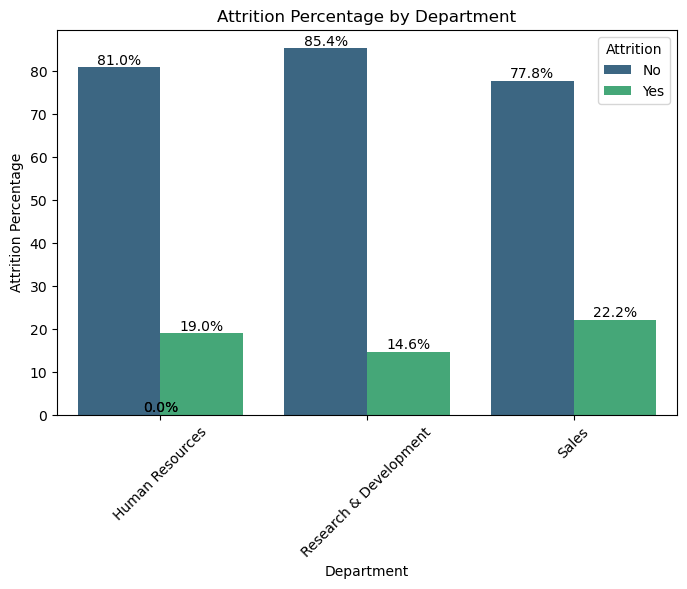

In [76]:
dept_attrition = (
    train_data.groupby("Department")["Attrition"]
    .value_counts()
    .mul(100)
    .rename("Percent")
    .reset_index()
)
# Count total employees per department
dept_total = train_data.groupby("Department").size().reset_index(name='Total')

# Count employees by Department and Attrition status
dept_counts = train_data.groupby(["Department", "Attrition"]).size().reset_index(name='Count')

# Merge the total counts with the attrition counts
dept_attrition = pd.merge(dept_counts, dept_total, on="Department")

# Calculate the percentage
dept_attrition["Percent"] = dept_attrition["Count"] / dept_attrition["Total"] * 100


plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Department", y="Percent", hue="Attrition", data=dept_attrition, palette="viridis")
plt.title("Attrition Percentage by Department")
plt.xlabel("Department")
plt.ylabel("Attrition Percentage")
plt.xticks(rotation=45)

# Loop through each bar and annotate with its percentage value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, color='black')

plt.legend(title="Attrition")
plt.show()

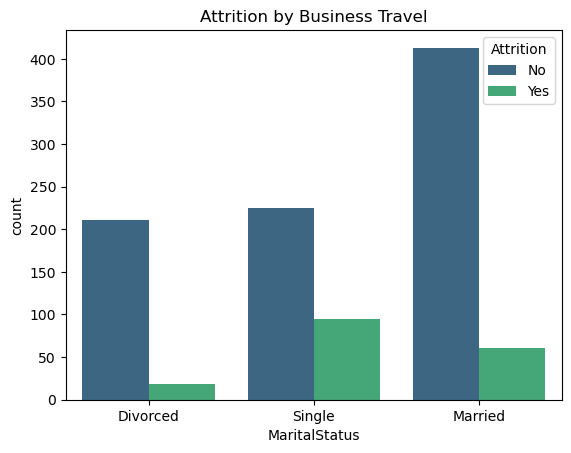

In [77]:
# Countplot of Attrition vs. BusinessTravel
sns.countplot(x="MaritalStatus", hue="Attrition", data=train_data, palette="viridis")
plt.title("Attrition by Business Travel")
plt.show()

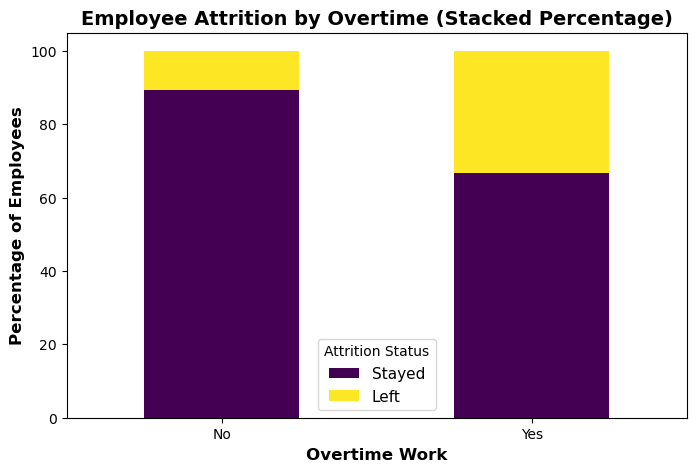

In [78]:
# Compute counts with percentage normalization
cross_tab = pd.crosstab(train_data["OverTime"], train_data["Attrition"], normalize='index') * 100  # Convert to %

# Plot stacked bar chart
cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))

# Label and Title
plt.title("Employee Attrition by Overtime (Stacked Percentage)", fontsize=14, fontweight="bold")
plt.xlabel("Overtime Work", fontsize=12, fontweight="bold")
plt.ylabel("Percentage of Employees", fontsize=12, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(["Stayed", "Left"], title="Attrition Status", fontsize=11)

# Display plot
plt.show()


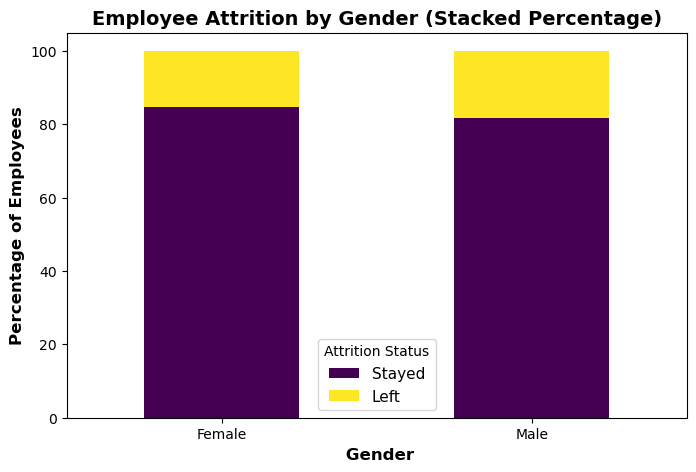

In [79]:
# Compute counts with percentage normalization
cross_tab = pd.crosstab(train_data["Gender"], train_data["Attrition"], normalize='index') * 100  # Convert to %

# Plot stacked bar chart
cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))

# Label and Title
plt.title("Employee Attrition by Gender (Stacked Percentage)", fontsize=14, fontweight="bold")
plt.xlabel(" Gender", fontsize=12, fontweight="bold")
plt.ylabel("Percentage of Employees", fontsize=12, fontweight="bold")
plt.xticks(rotation=0)
plt.legend(["Stayed", "Left"], title="Attrition Status", fontsize=11)

# Display plot
plt.show()


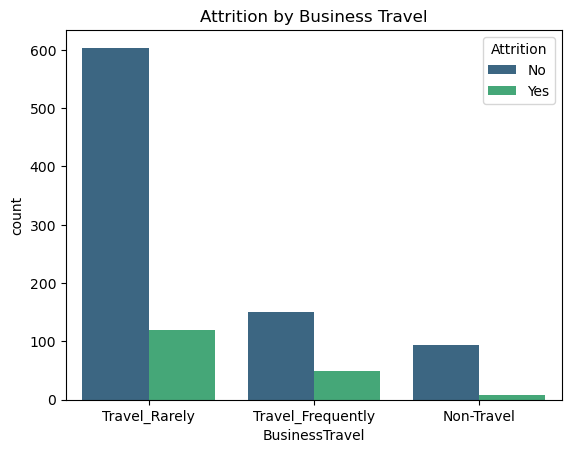

In [80]:
# Countplot of Attrition vs. BusinessTravel
sns.countplot(x="BusinessTravel", hue="Attrition", data=train_data, palette="viridis")
plt.title("Attrition by Business Travel")
plt.show()


# Examine for outliers

In [82]:
# Select only numerical columns
numerical_cols = train_data.select_dtypes(include=['number']).columns

# Function to check for outliers in a column using IQR
def has_outliers(column):
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)]
    return outliers.shape[0] > 0  # Returns True if outliers exist

# Check how many columns contain outliers
outlier_columns = [col for col in numerical_cols if has_outliers(col)]

print(f"Number of columns with outliers: {len(outlier_columns)}")
print("Columns containing outliers:", outlier_columns)

Number of columns with outliers: 10
Columns containing outliers: ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [83]:
numerical_cols = train_data.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_data[(train_data[column] < lower_bound) | (train_data[column] > upper_bound)]
    return outliers  # Returns DataFrame of outliers

# Dictionary to store outlier counts for each column
outlier_dict = {}

# Check outliers for all numerical columns
for col in numerical_cols:
    outliers = detect_outliers(col)
    if not outliers.empty:
        outlier_dict[col] = outliers.shape[0]

# Print the number of outliers per column
print("\nColumns with Outliers and Their Counts:")
for col, count in outlier_dict.items():
    print(f"{col}: {count} outliers")


Columns with Outliers and Their Counts:
MonthlyIncome: 68 outliers
NumCompaniesWorked: 38 outliers
PerformanceRating: 164 outliers
StockOptionLevel: 69 outliers
TotalWorkingYears: 45 outliers
TrainingTimesLastYear: 163 outliers
YearsAtCompany: 43 outliers
YearsInCurrentRole: 16 outliers
YearsSinceLastPromotion: 149 outliers
YearsWithCurrManager: 9 outliers


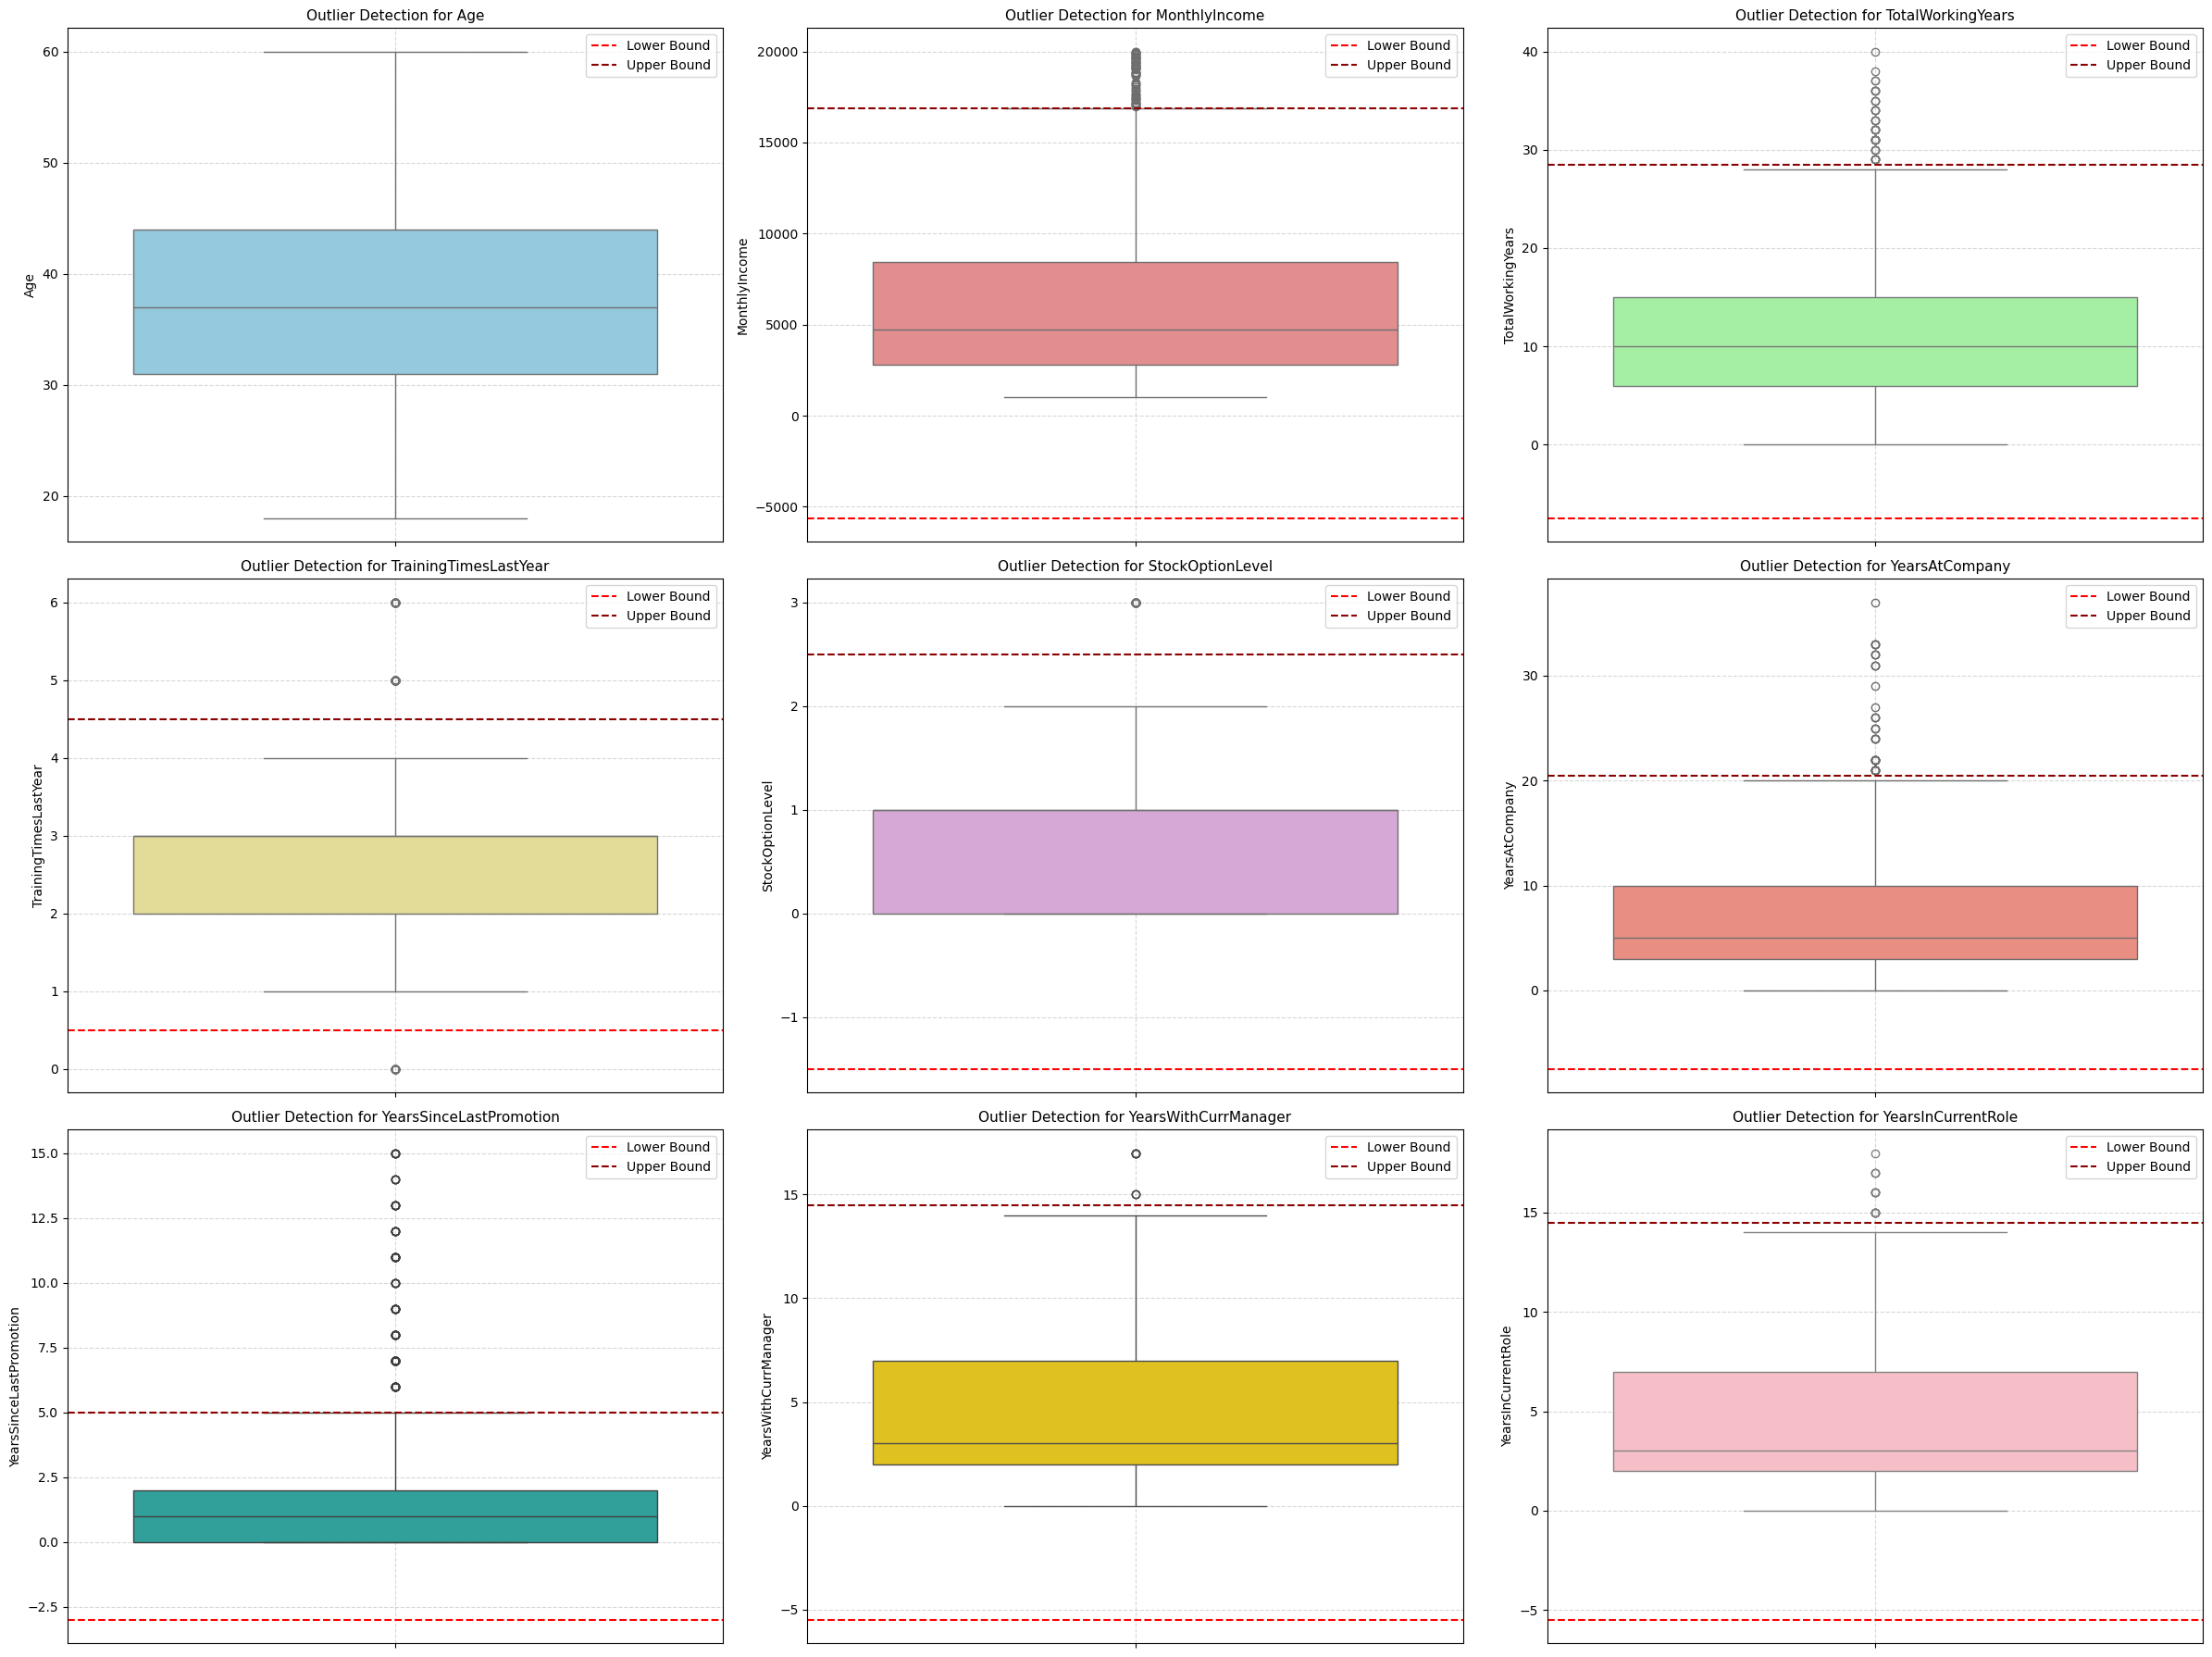

In [84]:
# === Outlier Examination & Capping ===
# Boxplots with colors and outlier lines in grid
fig, axs = plt.subplots(3, 3, figsize=(24, 18))
colors = ['skyblue', 'lightcoral', 'palegreen', 'khaki', 'plum', 'salmon', 'lightseagreen', 'gold', 'lightpink']
outlier_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear', 'StockOptionLevel', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearsInCurrentRole']
axs = axs.flatten()
for i, col in enumerate(outlier_features):
    col_iqr = iqr(train_data[col])
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    lower = q1 - 1.5 * col_iqr
    upper = q3 + 1.5 * col_iqr
    sns.boxplot(data=train_data, y=col, color=colors[i % len(colors)], ax=axs[i])
    axs[i].axhline(y=lower, color='red', linestyle='--', label='Lower Bound')
    axs[i].axhline(y=upper, color='darkred', linestyle='--', label='Upper Bound')
    axs[i].set_title(f"Outlier Detection for {col}", fontsize=11)
    axs[i].legend()
    axs[i].grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Preprocessing

In [86]:
# Capping and printing outlier counts
for col in outlier_features:
    col_iqr = iqr(train_data[col])
    q1 = train_data[col].quantile(0.25)
    q3 = train_data[col].quantile(0.75)
    lower = q1 - 1.5 * col_iqr
    upper = q3 + 1.5 * col_iqr
    outlier_count = train_data[(train_data[col] < lower) | (train_data[col] > upper)].shape[0]
    print(f"{col}: {outlier_count} outliers detected")
    train_data[col] = np.where(train_data[col] < lower, lower, train_data[col])
    train_data[col] = np.where(train_data[col] > upper, upper, train_data[col])
    print(f"{col}: Outliers capped at [{lower:.2f}, {upper:.2f}]")

Age: 0 outliers detected
Age: Outliers capped at [nan, nan]
MonthlyIncome: 68 outliers detected
MonthlyIncome: Outliers capped at [-5634.00, 16894.00]
TotalWorkingYears: 45 outliers detected
TotalWorkingYears: Outliers capped at [-7.50, 28.50]
TrainingTimesLastYear: 163 outliers detected
TrainingTimesLastYear: Outliers capped at [0.50, 4.50]
StockOptionLevel: 69 outliers detected
StockOptionLevel: Outliers capped at [-1.50, 2.50]
YearsAtCompany: 43 outliers detected
YearsAtCompany: Outliers capped at [-7.50, 20.50]
YearsSinceLastPromotion: 149 outliers detected
YearsSinceLastPromotion: Outliers capped at [-3.00, 5.00]
YearsWithCurrManager: 9 outliers detected
YearsWithCurrManager: Outliers capped at [-5.50, 14.50]
YearsInCurrentRole: 16 outliers detected
YearsInCurrentRole: Outliers capped at [-5.50, 14.50]


In [87]:
# الأعمدة العددية والنوعية
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_data.select_dtypes(include='object').columns

# تعويض القيم العددية المفقودة بالمتوسط
num_imputer = SimpleImputer(strategy='mean')
train_data[numeric_cols] = num_imputer.fit_transform(train_data[numeric_cols])

# تعويض القيم النوعية المفقودة بالقيمة الأكثر تكراراً
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])


In [88]:
# الأعمدة العددية والنوعية
numeric_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = test_data.select_dtypes(include='object').columns

# تعويض القيم العددية المفقودة بالمتوسط
num_imputer = SimpleImputer(strategy='mean')
test_data[numeric_cols] = num_imputer.fit_transform(test_data[numeric_cols])

# تعويض القيم النوعية المفقودة بالقيمة الأكثر تكراراً
cat_imputer = SimpleImputer(strategy='most_frequent')
test_data[categorical_cols] = cat_imputer.fit_transform(test_data[categorical_cols])


In [89]:
# استبعاد عمود الهدف
categorical_features = [col for col in categorical_cols if col != 'Attrition']
numerical_features = list(numeric_cols)

In [90]:
# إعداد المعالجات
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

In [91]:
train_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Advanced Data Analysis

## T TEST

In [94]:
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt

# نقسم الداتا حسب الاستقالة
attrition_yes = train_data[train_data['Attrition'] == 'Yes']
attrition_no = train_data[train_data['Attrition'] == 'No']

# ناخد كل الأعمدة العددية
all_numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# نستبعد الأعمدة اللي مالهاش معنى حقيقي
excluded_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']  # لو موجودين
numerical_cols = [col for col in all_numerical_cols if col not in excluded_cols]

# نحتفظ فقط بالأعمدة اللي فيها تباين (مش كلها نفس القيمة)
meaningful_numerical_cols = []
for col in numerical_cols:
    if train_data[col].nunique() > 1:  # لو العمود فيه أكثر من قيمة واحدة
        meaningful_numerical_cols.append(col)

print("الفيتشرز اللي هنختبرها:", meaningful_numerical_cols)

# نعمل T-test ونخزن النتائج
ttest_results = []

for feature in meaningful_numerical_cols:
    stat, pvalue = ttest_ind(attrition_yes[feature], attrition_no[feature], equal_var=False)
    ttest_results.append({'Feature': feature, 'T-statistic': stat, 'P-value': pvalue})

# نحول النتائج لداتا فريم
ttest_df = pd.DataFrame(ttest_results)

# نرتبهم حسب ال p-value
ttest_df = ttest_df.sort_values('P-value')




الفيتشرز اللي هنختبرها: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [95]:
# نطبع النتائج
print("\nنتائج T-test:")
print(ttest_df)


نتائج T-test:
                     Feature  T-statistic       P-value
16         TotalWorkingYears    -7.489255  9.261841e-13
9              MonthlyIncome    -6.950311  2.104607e-11
20        YearsInCurrentRole    -6.788620  6.797445e-11
7                   JobLevel    -6.652703  1.444230e-10
19            YearsAtCompany    -6.203795  1.998543e-09
15          StockOptionLevel    -5.709701  3.179917e-08
22      YearsWithCurrManager    -5.654183  3.918368e-08
0                        Age    -4.883071  1.915293e-06
6             JobInvolvement    -3.946891  1.040829e-04
8            JobSatisfaction    -3.221056  1.448409e-03
4    EnvironmentSatisfaction    -2.560160  1.106867e-02
2           DistanceFromHome     1.983462  4.841208e-02
21   YearsSinceLastPromotion    -1.976752  4.912907e-02
11        NumCompaniesWorked     1.810911  7.144449e-02
18           WorkLifeBalance    -1.614496  1.077611e-01
17     TrainingTimesLastYear    -1.302070  1.941119e-01
14  RelationshipSatisfaction    -

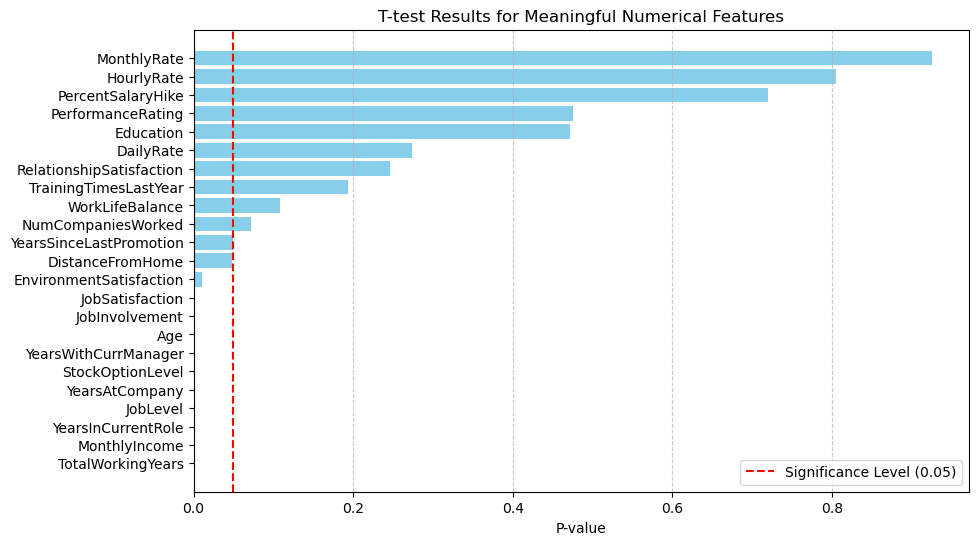

In [96]:
# نرسم Bar Plot للـ P-values
plt.figure(figsize=(10, 6))
plt.barh(ttest_df['Feature'], ttest_df['P-value'], color='skyblue')
plt.axvline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.xlabel('P-value')
plt.title('T-test Results for Meaningful Numerical Features')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##  CHI SQUARE

# correlation matrices

### Spearman Correlation Matrix

In [100]:
# from scipy.stats import spearmanr
# import pandas as pd

# # تحويل ال target لرقمي لو لسه
# train_data['Attrition'] = train_data['Attrition'].map({'Yes': 1, 'No': 0})

# # حذف الأعمدة الثابتة اللي مش مفيدة في التحليل
# train_data = train_data.drop(['EmployeeCount', 'StandardHours'], axis=1)

# # حدد الأعمدة العددية
# numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
# numeric_cols = [col for col in numeric_cols if col != 'Attrition']

# # حساب Spearman
# correlation_matrix_spearman, _ = spearmanr(train_data[numeric_cols + ['Attrition']])

# # تحويل النتيجة إلى DataFrame لعرضها بشكل مرتب
# correlation_matrix_spearman_df = pd.DataFrame(correlation_matrix_spearman, index=numeric_cols + ['Attrition'], columns=numeric_cols + ['Attrition'])

# # حساب Spearman Correlation مع Attrition
# spearman_corr = correlation_matrix_spearman_df['Attrition'].drop('Attrition')
# spearman_corr = spearman_corr.abs().sort_values(ascending=False)

# # عرض النتيجة في جدول
# correlation_spearman_df = pd.DataFrame({
#     'Feature': spearman_corr.index,
#     'Spearman Correlation': spearman_corr.values
# })

# # عرض جدول الارتباطات
# print("🔍 Spearman Correlation Matrix:")
# print(correlation_spearman_df)


In [101]:
from scipy.stats import spearmanr
import pandas as pd

# نشتغل على نسخة مستقلة من البيانات عشان منبوظش الأصلية
df_spearman = train_data.copy()

# تأكد من تحويل Target
df_spearman['Attrition'] = df_spearman['Attrition'].map({'Yes': 1, 'No': 0})

# حذف الأعمدة الغير مفيدة فقط من النسخة دي
df_spearman = df_spearman.drop(['EmployeeCount', 'StandardHours'], axis=1)

# الأعمدة العددية
numeric_cols = df_spearman.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Attrition']

# حساب Spearman
correlation_matrix_spearman, _ = spearmanr(df_spearman[numeric_cols + ['Attrition']])
correlation_matrix_spearman_df = pd.DataFrame(correlation_matrix_spearman, index=numeric_cols + ['Attrition'], columns=numeric_cols + ['Attrition'])

# استخراج Spearman مع Attrition
spearman_corr = correlation_matrix_spearman_df['Attrition'].drop('Attrition').abs().sort_values(ascending=False)

# جدول النتائج
correlation_spearman_df = pd.DataFrame({
    'Feature': spearman_corr.index,
    'Spearman Correlation': spearman_corr.values
})

print("🔍 Spearman Correlation Matrix:")
print(correlation_spearman_df)


🔍 Spearman Correlation Matrix:
                     Feature  Spearman Correlation
0          TotalWorkingYears              0.229886
1              MonthlyIncome              0.222266
2         YearsInCurrentRole              0.218073
3             YearsAtCompany              0.211593
4                   JobLevel              0.206308
5           StockOptionLevel              0.202859
6       YearsWithCurrManager              0.183188
7                        Age              0.161907
8             JobInvolvement              0.120111
9            JobSatisfaction              0.100495
10   EnvironmentSatisfaction              0.078954
11   YearsSinceLastPromotion              0.070417
12          DistanceFromHome              0.062918
13           WorkLifeBalance              0.047810
14     TrainingTimesLastYear              0.039993
15        NumCompaniesWorked              0.037664
16  RelationshipSatisfaction              0.035157
17                 DailyRate              0.033872


#### detect data linear or not 
# person colleration

In [103]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # تحويل ال target لرقمي لو لسه
# train_data['Attrition'] = train_data['Attrition'].map({'Yes': 1, 'No': 0})

# # حذف الأعمدة الثابتة اللي مش مفيدة في التحليل
# # train_data = train_data.drop(['EmployeeCount', 'StandardHours'], axis=1)

# # حدد الأعمدة العددية
# numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
# numeric_cols = [col for col in numeric_cols if col != 'Attrition']

# # نحسب Pearson
# pearson_corr = train_data[numeric_cols + ['Attrition']].corr(method='pearson')['Attrition'].drop('Attrition')

# # نعرض النتائج في جدول
# correlation_df = pd.DataFrame({
#     'Feature': numeric_cols,
#     'Pearson Correlation': pearson_corr.values
# })

# # ترتيب حسب أقوى ارتباط
# correlation_df = correlation_df.reindex(correlation_df['Pearson Correlation'].abs().sort_values(ascending=False).index)
# # print(correlation_df)

# # ===== Scatter plots
# # نرسم Scatter plots بين كل feature مهمة و Attrition

# top_features = correlation_df['Feature'].head(10).tolist()  # نركز على أقوى 10 مثلا

# fig, axs = plt.subplots(5, 2, figsize=(15, 20))
# axs = axs.flatten()

# for i, feature in enumerate(top_features):
#     sns.scatterplot(x=train_data[feature], y=train_data['Attrition'], ax=axs[i])
#     axs[i].set_title(f"{feature} vs Attrition", fontsize=12)
#     axs[i].grid(True, linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.show()

# # ===== تحسين Pearson Correlation (مثال: تطبيق تحويلات لزيادة خطية العلاقة)
# # نطبق بعض التحويلات على بعض الفيتشرز إذا لزم الأمر لتحسين الخطية.



# # إعادة حساب Pearson بعد التحويلات
# pearson_corr = train_data[numeric_cols + ['Attrition']].corr(method='pearson')['Attrition'].drop('Attrition')

# # نعرض النتائج بعد التحسين
# correlation_df = pd.DataFrame({
#     'Feature': numeric_cols,
#     'Pearson Correlation': pearson_corr.values
# })

# # ترتيب حسب أقوى ارتباط بعد التحسين
# correlation_df = correlation_df.reindex(correlation_df['Pearson Correlation'].abs().sort_values(ascending=False).index)
# print(correlation_df)


📊 Pearson Correlation Matrix:
                     Feature  Pearson Correlation
19         TotalWorkingYears            -0.209553
23        YearsInCurrentRole            -0.189933
9                   JobLevel            -0.181610
11             MonthlyIncome            -0.178299
18          StockOptionLevel            -0.176016
22            YearsAtCompany            -0.174966
25      YearsWithCurrManager            -0.160930
0                        Age            -0.160176
8             JobInvolvement            -0.129238
10           JobSatisfaction            -0.102101
6    EnvironmentSatisfaction            -0.082964
2           DistanceFromHome             0.062524
13        NumCompaniesWorked             0.061832
24   YearsSinceLastPromotion            -0.059971
21           WorkLifeBalance            -0.054439
20     TrainingTimesLastYear            -0.041769
16  RelationshipSatisfaction            -0.036987
1                  DailyRate            -0.033794
3                  E

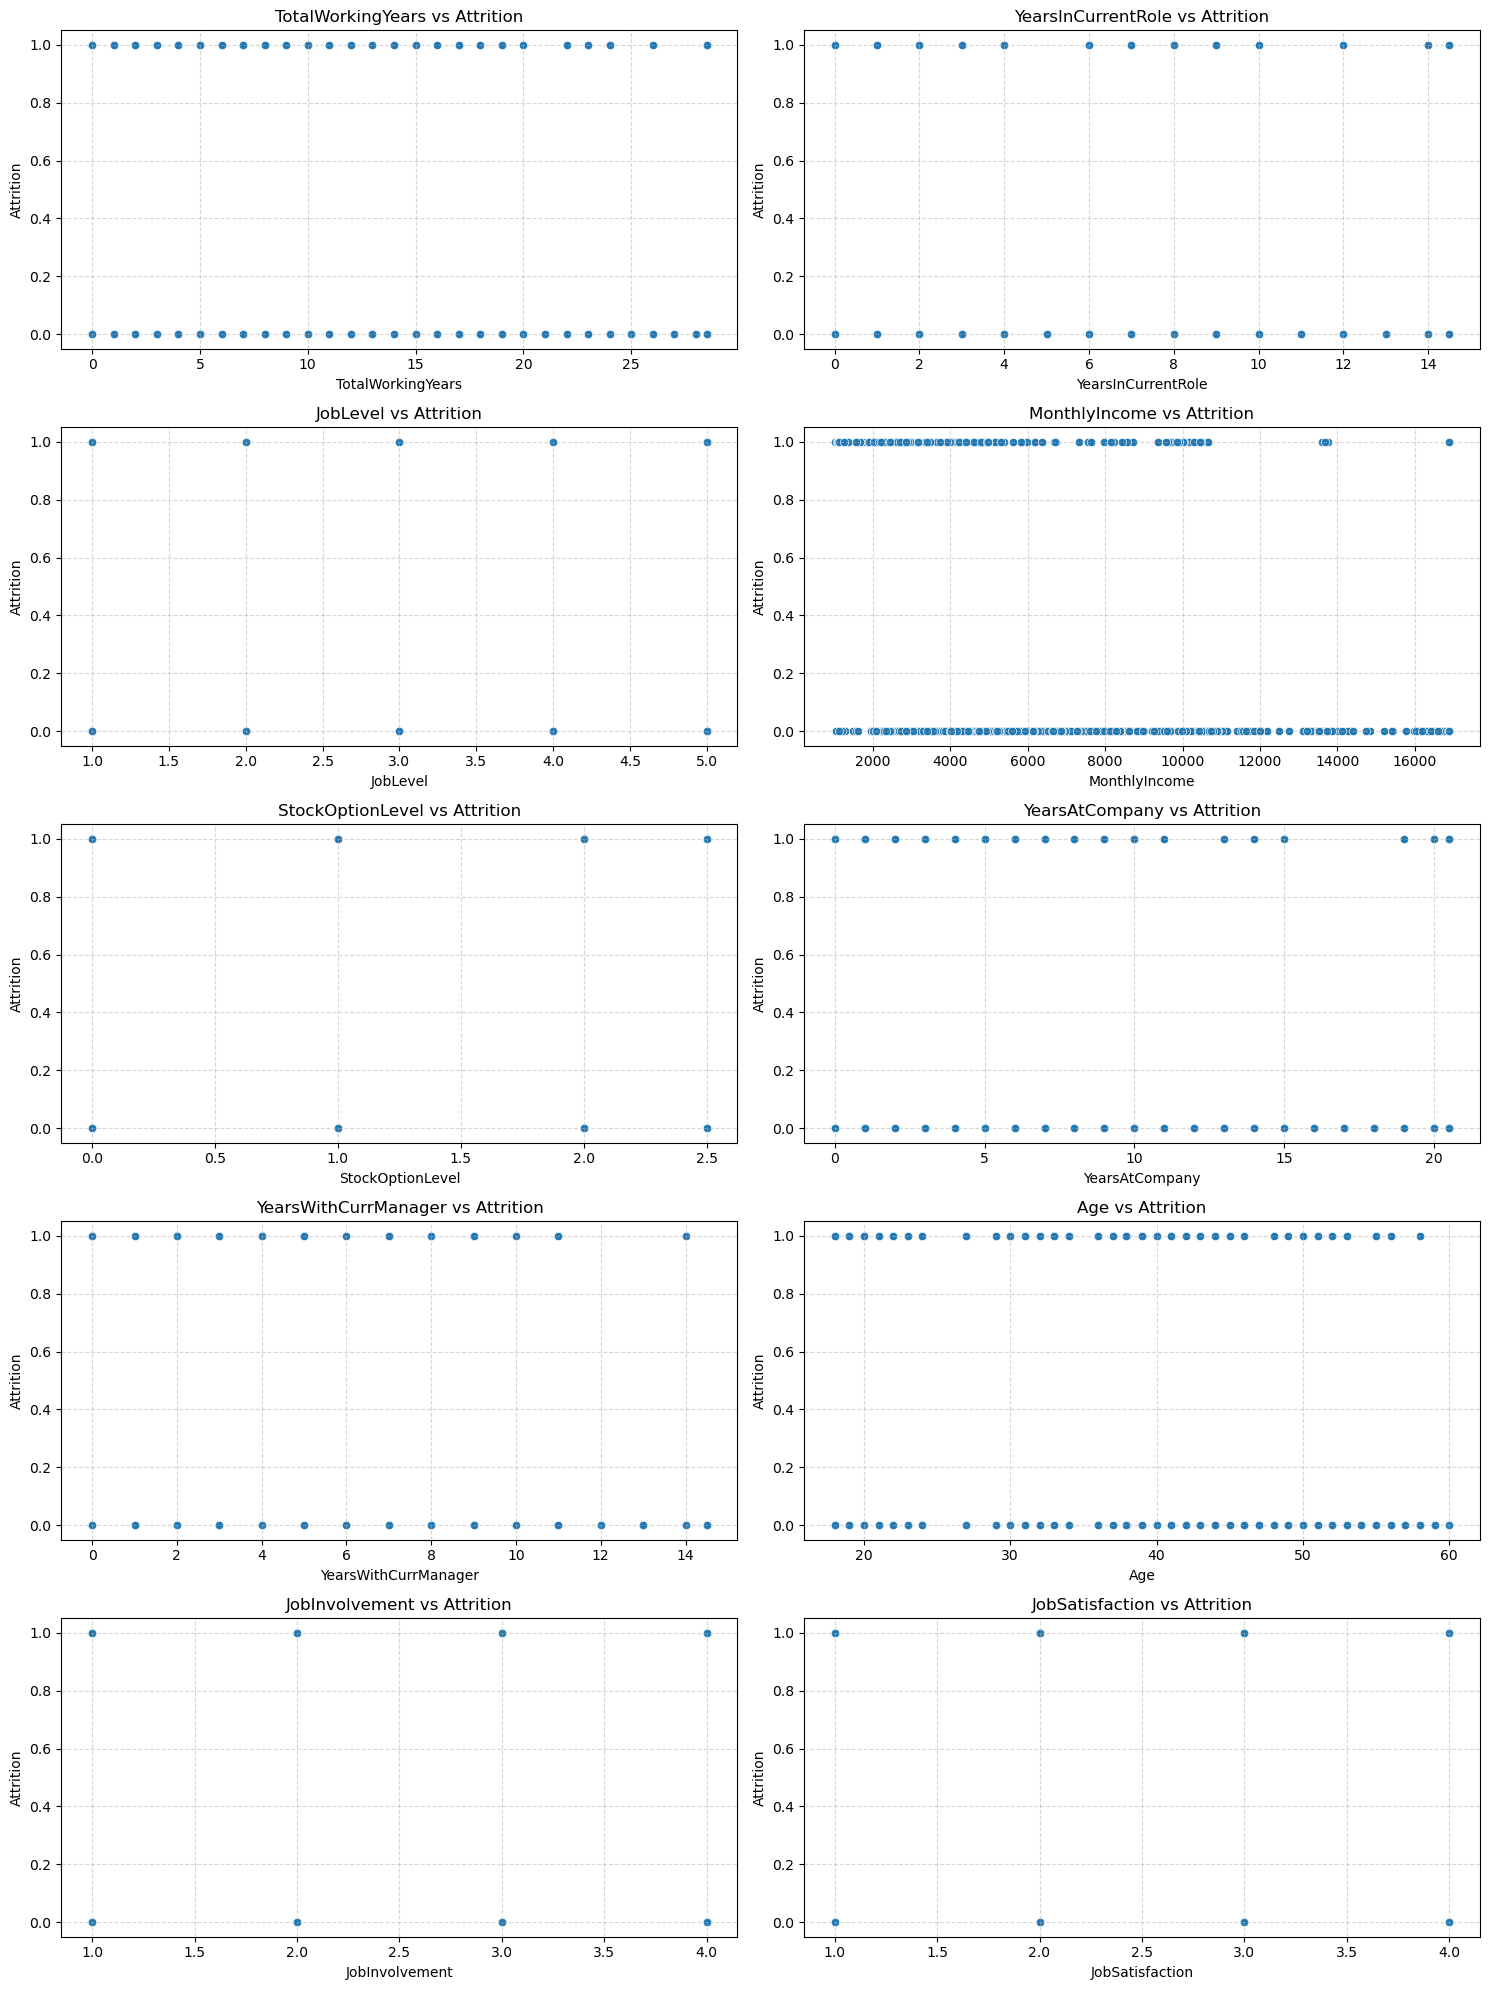

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# نشتغل على نسخة مستقلة بردو
df_pearson = train_data.copy()

# تحويل Attrition لرقمي
df_pearson['Attrition'] = df_pearson['Attrition'].map({'Yes': 1, 'No': 0})

# الأعمدة العددية
numeric_cols = df_pearson.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Attrition']

# حساب Pearson
pearson_corr = df_pearson[numeric_cols + ['Attrition']].corr(method='pearson')['Attrition'].drop('Attrition')

# جدول النتائج
correlation_df = pd.DataFrame({
    'Feature': numeric_cols,
    'Pearson Correlation': pearson_corr.values
})

correlation_df = correlation_df.reindex(correlation_df['Pearson Correlation'].abs().sort_values(ascending=False).index)
print("📊 Pearson Correlation Matrix:")
print(correlation_df)

# رسم Scatter لأعلى 10
top_features = correlation_df['Feature'].head(10).tolist()

fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()

for i, feature in enumerate(top_features):
    sns.scatterplot(x=df_pearson[feature], y=df_pearson['Attrition'], ax=axs[i])
    axs[i].set_title(f"{feature} vs Attrition", fontsize=12)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# RFE logestic

In [106]:
train_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [107]:
# نفترض أن df هي الداتا الأصلية
X = train_data.drop('Attrition', axis=1)
y = train_data['Attrition']
y = LabelEncoder().fit_transform(train_data['Attrition'])

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# نسخ البيانات
X_rfe = X.copy()
y_rfe = y.copy()

# ترميز الأعمدة الـ object (لو فيه)
for col in X_rfe.select_dtypes(include='object').columns:
    X_rfe[col] = LabelEncoder().fit_transform(X_rfe[col])

# تقييس البيانات عشان اللوجستيك يشتغل كويس
scaler = StandardScaler()
X_rfe_scaled = scaler.fit_transform(X_rfe)

# إنشاء نموذج اللوجستيك
model = LogisticRegression(solver='liblinear', random_state=42)

# تطبيق RFE
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_rfe_scaled, y_rfe)

# عرض الميزات المختارة
selected_features_rfe = X_rfe.columns[rfe.support_]
print("أفضل 10 ميزات حسب RFE باستخدام Logistic Regression:")
print(selected_features_rfe)



أفضل 10 ميزات حسب RFE باستخدام Logistic Regression:
Index(['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')


# chi Square

In [109]:
train_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [110]:
from sklearn.feature_selection import SelectKBest, chi2

# ترميز الخصائص التصنيفية وتحضير البيانات
X_chi2 = X.copy()
for col in X_chi2.select_dtypes(include='object').columns:
    X_chi2[col] = LabelEncoder().fit_transform(X_chi2[col])

# تطبيق اختبار كاي تربيع لاختيار أفضل 10 خصائص
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_kbest = chi2_selector.fit_transform(X_chi2, y)

# طباعة أفضل الخصائص
selected_features_chi = X_chi2.columns[chi2_selector.get_support()]
print("أفضل الخصائص حسب اختبار كاي تربيع:")
print(selected_features_chi)


أفضل الخصائص حسب اختبار كاي تربيع:
Index(['Age', 'DailyRate', 'EmployeeNumber', 'MonthlyIncome', 'MonthlyRate',
       'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')


# Anova test 

In [112]:
from sklearn.feature_selection import SelectKBest, f_classif

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_num = X[numerical_cols]

anova_selector = SelectKBest(score_func=f_classif, k=10)
anova_selector.fit(X_num, y)

selected_features_anova = numerical_cols[anova_selector.get_support()]
print("أفضل الخصائص العددية حسب ANOVA:")
print(selected_features_anova)


أفضل الخصائص العددية حسب ANOVA:
Index(['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [113]:
train_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [114]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.000000,2.0,Medical,1.0,997.0,...,3.0,80.0,1.0,28.5,1.0,2.0,5.0,4.0,1.0,3.0
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.000000,2.0,Medical,1.0,178.0,...,4.0,80.0,2.0,7.0,0.5,3.0,3.0,2.0,0.0,1.0
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.000000,1.0,Marketing,1.0,1780.0,...,2.0,80.0,0.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,9.930407,3.0,Medical,1.0,644.0,...,3.0,80.0,1.0,28.5,2.0,3.0,20.5,5.0,5.0,7.0
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.000000,4.0,Life Sciences,1.0,1118.0,...,4.0,80.0,0.0,18.0,4.0,3.0,8.0,6.0,4.0,0.0


In [115]:
test_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38.0,Travel_Rarely,866.0,Sales,9.459948,3.0,Medical,1.0,1469.0,4.0,...,4.0,80.0,0.0,6.0,4.0,3.0,5.0,4.0,1.0,3.0
1,53.0,Travel_Rarely,1084.0,Research & Development,13.000000,2.0,Medical,1.0,250.0,4.0,...,3.0,80.0,2.0,5.0,3.0,3.0,4.0,2.0,1.0,3.0
2,24.0,Travel_Rarely,240.0,Human Resources,22.000000,1.0,Human Resources,1.0,1714.0,4.0,...,3.0,80.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.000000,3.0,Life Sciences,1.0,86.0,2.0,...,3.0,80.0,1.0,25.0,2.0,3.0,1.0,0.0,0.0,0.0
4,36.0,Travel_Rarely,1396.0,Research & Development,9.459948,2.0,Life Sciences,1.0,304.0,4.0,...,4.0,80.0,0.0,16.0,3.0,4.0,13.0,11.0,3.0,7.0


# Selected Features

In [117]:
from collections import Counter

# 1. تجميع الفيتشرز من الطرق المختلفة
all_selected_features = []

# نضيف نتائج كل طريقة
all_selected_features += list(selected_features_anova)
all_selected_features += list(selected_features_chi)
all_selected_features += list(selected_features_rfe)
all_selected_features += correlation_df['Feature'].head(10).tolist()       # أعلى 10 حسب Pearson
all_selected_features += ttest_df.head(10)['Feature'].tolist()             # أعلى 10 حسب T-test

# 2. نعد عدد مرات تكرار كل فيتشر
feature_counts = Counter(all_selected_features)

# 3. نختار الفيتشرز اللي ظهرت في 3 طرق أو أكثر
selected_features = [feature for feature, count in feature_counts.items() if count >= 3]

print("🔍 الفيتشرز المشتركة في 3 طرق أو أكثر:")
print(selected_features)

🔍 الفيتشرز المشتركة في 3 طرق أو أكثر:
['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


In [118]:

from collections import Counter

# 1. تجميع الفيتشرز من الطرق المختلفة
all_selected_features = []

# نضيف نتائج كل طريقة
all_selected_features += list(selected_features_anova)
all_selected_features += list(selected_features_chi)
all_selected_features += list(selected_features_rfe)
all_selected_features += correlation_spearman_df['Feature'].head(10).tolist()
all_selected_features += ttest_df.head(10)['Feature'].tolist()             # أعلى 10 حسب T-test

# 2. نعد عدد مرات تكرار كل فيتشر
feature_counts = Counter(all_selected_features)

# 3. نختار الفيتشرز اللي ظهرت في 3 طرق أو أكثر
selected_features = [feature for feature, count in feature_counts.items() if count >= 3]

print("🔍 الفيتشرز المشتركة في 3 طرق أو أكثر:")
print(selected_features)

🔍 الفيتشرز المشتركة في 3 طرق أو أكثر:
['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


# Feature Engineering

In [120]:
# 4. Feature Engineering
def tenure_category(years):
    if years < 3:
        return 'Short-term'
    elif 3 <= years <= 7:
        return 'Mid-term'
    else:
        return 'Long-term'

# تطبيق Feature Engineering
train_data['TenureCategory'] = train_data['TotalWorkingYears'].apply(tenure_category)
train_data['SalaryBand'] = pd.qcut(train_data['MonthlyIncome'], q=3, labels=['Low', 'Medium', 'High'])

# 5. تحديث قائمة الفيتشرز بعد استبدال الأصلية بالمعدلة
final_selected_features = selected_features.copy()

if 'TotalWorkingYears' in final_selected_features:
    final_selected_features.remove('TotalWorkingYears')
    final_selected_features.append('TenureCategory')

if 'MonthlyIncome' in final_selected_features:
    final_selected_features.remove('MonthlyIncome')
    final_selected_features.append('SalaryBand')

# 6. إنشاء final_df الجاهزة للنمذجة
final_train_df = train_data[final_selected_features + ['Attrition']]

# 7. عرض النتيجة
print("✅ شكل الداتا فريم النهائي:")
display(final_train_df.head(15))

print("📊 عدد الفيتشرز:", len(final_selected_features))
print("🧾 أسماء الأعمدة النهائية:")
print(final_train_df.columns.tolist())

✅ شكل الداتا فريم النهائي:


,Age,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,TenureCategory,SalaryBand,Attrition
0,50.000000,3.0,4.0,4.0,1.0,5.0,4.0,3.0,Long-term,High,No
1,36.000000,3.0,2.0,2.0,2.0,3.0,2.0,1.0,Mid-term,Medium,No
2,21.000000,3.0,1.0,2.0,0.0,1.0,0.0,0.0,Short-term,Low,Yes
3,50.000000,3.0,5.0,2.0,1.0,20.5,5.0,7.0,Long-term,High,No
4,52.000000,3.0,3.0,2.0,0.0,8.0,6.0,0.0,Long-term,High,No
5,33.000000,3.0,3.0,3.0,0.0,7.0,6.0,7.0,Long-term,High,Yes
6,47.000000,2.0,3.0,2.0,1.0,20.5,11.0,10.0,Long-term,High,No
7,22.000000,2.0,2.0,4.0,2.0,2.0,2.0,2.0,Mid-term,Medium,No
8,37.930571,3.0,1.0,3.0,0.0,2.0,2.0,1.0,Mid-term,Medium,Yes
9,33.000000,3.0,2.0,4.0,1.0,6.0,5.0,2.0,Mid-term,Medium,No


📊 عدد الفيتشرز: 10
🧾 أسماء الأعمدة النهائية:
['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'TenureCategory', 'SalaryBand', 'Attrition']


In [121]:
final_train_df

,Age,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,TenureCategory,SalaryBand,Attrition
0,50.000000,3.0,4.0,4.0,1.0,5.0,4.0,3.0,Long-term,High,No
1,36.000000,3.0,2.0,2.0,2.0,3.0,2.0,1.0,Mid-term,Medium,No
2,21.000000,3.0,1.0,2.0,0.0,1.0,0.0,0.0,Short-term,Low,Yes
3,50.000000,3.0,5.0,2.0,1.0,20.5,5.0,7.0,Long-term,High,No
4,52.000000,3.0,3.0,2.0,0.0,8.0,6.0,0.0,Long-term,High,No
...,...,...,...,...,...,...,...,...,...,...,...
1024,37.930571,4.0,2.0,3.0,2.0,10.0,9.0,8.0,Long-term,Medium,No
1025,41.000000,4.0,2.0,2.0,0.0,3.0,2.0,2.0,Long-term,High,No
1026,22.000000,2.0,1.0,4.0,1.0,0.0,0.0,0.0,Short-term,Low,Yes
1027,29.000000,2.0,2.0,2.0,1.0,4.0,3.0,3.0,Long-term,Medium,No


In [122]:
final_train_df.isnull().sum()

Age                     0
JobInvolvement          0
JobLevel                0
JobSatisfaction         0
StockOptionLevel        0
YearsAtCompany          0
YearsInCurrentRole      0
YearsWithCurrManager    0
TenureCategory          0
SalaryBand              0
Attrition               0
dtype: int64

In [123]:
# 4. Feature Engineering
def tenure_category(years):
    if years < 3:
        return 'Short-term'
    elif 3 <= years <= 7:
        return 'Mid-term'
    else:
        return 'Long-term'

# تطبيق Feature Engineering
test_data['TenureCategory'] = test_data['TotalWorkingYears'].apply(tenure_category)
test_data['SalaryBand'] = pd.qcut(test_data['MonthlyIncome'], q=3, labels=['Low', 'Medium', 'High'])

# 5. تحديث قائمة الفيتشرز بعد استبدال الأصلية بالمعدلة
final_selected_features = selected_features.copy()

if 'TotalWorkingYears' in final_selected_features:
    final_selected_features.remove('TotalWorkingYears')
    final_selected_features.append('TenureCategory')

if 'MonthlyIncome' in final_selected_features:
    final_selected_features.remove('MonthlyIncome')
    final_selected_features.append('SalaryBand')

# 6. إنشاء final_df الجاهزة للنمذجة
final_test_df = test_data[final_selected_features ]

# 7. عرض النتيجة
print("✅ شكل الداتا فريم النهائي:")
display(final_test_df.head(15))

print("📊 عدد الفيتشرز:", len(final_selected_features))
print("🧾 أسماء الأعمدة النهائية:")
print(final_test_df.columns.tolist())

✅ شكل الداتا فريم النهائي:


,Age,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,TenureCategory,SalaryBand
0,38.0,3.0,2.0,1.0,0.0,5.0,4.0,3.0,Mid-term,High
1,53.0,4.0,2.0,1.0,2.0,4.0,2.0,3.0,Mid-term,Medium
2,24.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,Short-term,Low
3,45.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,Long-term,High
4,36.0,3.0,2.0,2.0,0.0,13.0,11.0,7.0,Long-term,Medium
5,34.0,3.0,1.0,3.0,2.0,8.0,2.0,6.0,Long-term,Low
6,38.0,1.0,1.0,3.0,0.0,5.0,4.0,3.0,Mid-term,Low
7,39.0,3.0,1.0,3.0,3.0,3.0,2.0,2.0,Mid-term,Low
8,45.0,2.0,3.0,4.0,0.0,19.0,7.0,8.0,Long-term,High
9,38.0,4.0,1.0,4.0,0.0,1.0,0.0,1.0,Short-term,Low


📊 عدد الفيتشرز: 10
🧾 أسماء الأعمدة النهائية:
['Age', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'TenureCategory', 'SalaryBand']


In [124]:
final_train_df.head(15)

,Age,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,TenureCategory,SalaryBand,Attrition
0,50.000000,3.0,4.0,4.0,1.0,5.0,4.0,3.0,Long-term,High,No
1,36.000000,3.0,2.0,2.0,2.0,3.0,2.0,1.0,Mid-term,Medium,No
2,21.000000,3.0,1.0,2.0,0.0,1.0,0.0,0.0,Short-term,Low,Yes
3,50.000000,3.0,5.0,2.0,1.0,20.5,5.0,7.0,Long-term,High,No
4,52.000000,3.0,3.0,2.0,0.0,8.0,6.0,0.0,Long-term,High,No
5,33.000000,3.0,3.0,3.0,0.0,7.0,6.0,7.0,Long-term,High,Yes
6,47.000000,2.0,3.0,2.0,1.0,20.5,11.0,10.0,Long-term,High,No
7,22.000000,2.0,2.0,4.0,2.0,2.0,2.0,2.0,Mid-term,Medium,No
8,37.930571,3.0,1.0,3.0,0.0,2.0,2.0,1.0,Mid-term,Medium,Yes
9,33.000000,3.0,2.0,4.0,1.0,6.0,5.0,2.0,Mid-term,Medium,No


In [125]:
final_train_df.isnull().sum()

Age                     0
JobInvolvement          0
JobLevel                0
JobSatisfaction         0
StockOptionLevel        0
YearsAtCompany          0
YearsInCurrentRole      0
YearsWithCurrManager    0
TenureCategory          0
SalaryBand              0
Attrition               0
dtype: int64

In [126]:
final_test_df.head(15)

,Age,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,TenureCategory,SalaryBand
0,38.0,3.0,2.0,1.0,0.0,5.0,4.0,3.0,Mid-term,High
1,53.0,4.0,2.0,1.0,2.0,4.0,2.0,3.0,Mid-term,Medium
2,24.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,Short-term,Low
3,45.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,Long-term,High
4,36.0,3.0,2.0,2.0,0.0,13.0,11.0,7.0,Long-term,Medium
5,34.0,3.0,1.0,3.0,2.0,8.0,2.0,6.0,Long-term,Low
6,38.0,1.0,1.0,3.0,0.0,5.0,4.0,3.0,Mid-term,Low
7,39.0,3.0,1.0,3.0,3.0,3.0,2.0,2.0,Mid-term,Low
8,45.0,2.0,3.0,4.0,0.0,19.0,7.0,8.0,Long-term,High
9,38.0,4.0,1.0,4.0,0.0,1.0,0.0,1.0,Short-term,Low


# Machine Learning Model Development

In [128]:
# Depi Project: Structured Model Training with SMOTE and CV

## 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

C:\Users\pc\AppData\Local\Temp\ipykernel_15324\90269346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train_df['Attrition'] = final_train_df['Attrition'].map({'Yes': 1, 'No': 0})


📊 Model Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression  0.854369
1        Random Forest  0.834951

📋 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       171
           1       0.86      0.17      0.29        35

    accuracy                           0.85       206
   macro avg       0.86      0.58      0.60       206
weighted avg       0.85      0.85      0.81       206


📋 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       171
           1       0.53      0.26      0.35        35

    accuracy                           0.83       206
   macro avg       0.70      0.61      0.63       206
weighted avg       0.81      0.83      0.81       206



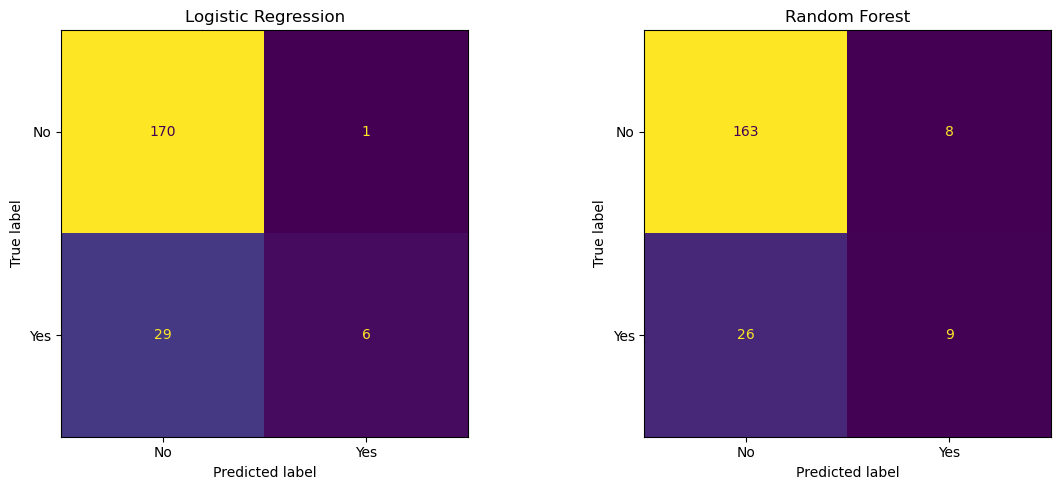


📈 Cross-Validation with SMOTE Results:
                         Model   F1 Mean    F1 Std
0  Logistic Regression (SMOTE)  0.416688  0.048345
1        Random Forest (SMOTE)  0.256003  0.086757


In [129]:
# 1. تحويل الهدف لرقمي
final_train_df['Attrition'] = final_train_df['Attrition'].map({'Yes': 1, 'No': 0})
X = final_train_df.drop(columns=['Attrition']).copy()
y = final_train_df['Attrition'].copy()

# 2. ترميز الأعمدة النوعية
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# 3. تعويض القيم المفقودة
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 4. تقسيم البيانات إلى train و validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Scaling لوجستي فقط
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 6. تدريب Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_val_scaled)

# 7. تدريب Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

# 8. تقييم الأداء
log_acc = accuracy_score(y_val, log_preds)
rf_acc = accuracy_score(y_val, rf_preds)

# 9. عرض مقارنة الأداء
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [log_acc, rf_acc]
})
print("📊 Model Accuracy Comparison:")
print(comparison_df)

# 10. تقارير التصنيف
print("\n📋 Logistic Regression Classification Report:\n")
print(classification_report(y_val, log_preds))

print("\n📋 Random Forest Classification Report:\n")
print(classification_report(y_val, rf_preds))

# 11. مصفوفات الالتباس
log_cm = confusion_matrix(y_val, log_preds)
rf_cm = confusion_matrix(y_val, rf_preds)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(log_cm, display_labels=["No", "Yes"]).plot(ax=ax[0], colorbar=False)
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay(rf_cm, display_labels=["No", "Yes"]).plot(ax=ax[1], colorbar=False)
ax[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

# 12. SMOTE + Cross-Validation (على train فقط)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_pipe = Pipeline([
    ('smote', smote),
    ('log_model', LogisticRegression(max_iter=5000))
])
rf_pipe = Pipeline([
    ('smote', smote),
    ('rf_model', RandomForestClassifier(n_estimators=100, random_state=42))
])

log_scores = cross_val_score(log_pipe, X_train_scaled, y_train, cv=kfold, scoring='f1')
rf_scores = cross_val_score(rf_pipe, X_train, y_train, cv=kfold, scoring='f1')

smote_cv_results = pd.DataFrame({
    'Model': ['Logistic Regression (SMOTE)', 'Random Forest (SMOTE)'],
    'F1 Mean': [log_scores.mean(), rf_scores.mean()],
    'F1 Std': [log_scores.std(), rf_scores.std()]
})
print("\n📈 Cross-Validation with SMOTE Results:")
print(smote_cv_results)


In [130]:
from sklearn.model_selection import GridSearchCV

# تعريف المعلمات المراد تجربتها
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # يدعم l1 و l2
}

grid_log = GridSearchCV(
    LogisticRegression(max_iter=5000),
    log_params,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1
)
grid_log.fit(X_train_scaled, y_train)

# أفضل بارامترات
print("Best Logistic Regression Params:", grid_log.best_params_)

# تقييم على validation
log_best = grid_log.best_estimator_
log_val_preds = log_best.predict(X_val_scaled)
print(classification_report(y_val, log_val_preds))


Best Logistic Regression Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       171
           1       0.86      0.17      0.29        35

    accuracy                           0.85       206
   macro avg       0.86      0.58      0.60       206
weighted avg       0.85      0.85      0.81       206



In [131]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
print("Best Random Forest Params:", grid_rf.best_params_)
rf_best = grid_rf.best_estimator_
rf_val_preds = rf_best.predict(X_val)
print(classification_report(y_val, rf_val_preds))


Best Random Forest Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       171
           1       0.64      0.26      0.37        35

    accuracy                           0.85       206
   macro avg       0.75      0.61      0.64       206
weighted avg       0.83      0.85      0.82       206



In [132]:
# 1. نسخة من الـ test
X_final_test = final_test_df.copy()  # دي الداتا بعد pre-cleaning

# 2. ترميز الأعمدة النوعية
for col in X_final_test.columns:
    if X_final_test[col].dtype == 'object' or X_final_test[col].dtype.name == 'category':
        le = LabelEncoder()
        X_final_test[col] = le.fit_transform(X_final_test[col])

# 3. تعويض القيم المفقودة
X_final_test = pd.DataFrame(imputer.transform(X_final_test), columns=X_final_test.columns)

# 4. Scaling (لو هنستخدم اللوجيستي مثلًا)
X_final_test_scaled = scaler.transform(X_final_test)


In [133]:
# توقع باستخدام أفضل موديل
test_preds = log_best.predict(X_final_test_scaled)

# أو لو Random Forest
# test_preds = rf_best.predict(X_final_test)

In [134]:
final_test_df["Predicted_Attrition"] = test_preds
final_test_df["Predicted_Attrition"] = final_test_df["Predicted_Attrition"].map({1: 'Yes', 0: 'No'})

# حفظ النتيجة
final_test_df.to_csv("attrition_predictions.csv", index=False)


C:\Users\pc\AppData\Local\Temp\ipykernel_15324\3739818971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df["Predicted_Attrition"] = test_preds
C:\Users\pc\AppData\Local\Temp\ipykernel_15324\3739818971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df["Predicted_Attrition"] = final_test_df["Predicted_Attrition"].map({1: 'Yes', 0: 'No'})


In [135]:
import os
print(os.getcwd())

C:\Users\pc


In [147]:
final_test_df.head()

,Age,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,TenureCategory,SalaryBand,Predicted_Attrition
0,38.0,3.0,2.0,1.0,0.0,5.0,4.0,3.0,Mid-term,High,No
1,53.0,4.0,2.0,1.0,2.0,4.0,2.0,3.0,Mid-term,Medium,No
2,24.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,Short-term,Low,Yes
3,45.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,Long-term,High,No
4,36.0,3.0,2.0,2.0,0.0,13.0,11.0,7.0,Long-term,Medium,No


# Visualizations

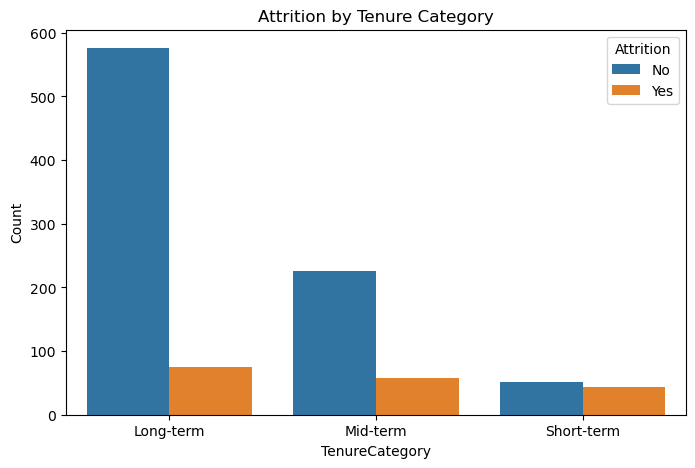

In [137]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='TenureCategory', hue='Attrition')
plt.title('Attrition by Tenure Category')
plt.ylabel('Count')
plt.show()

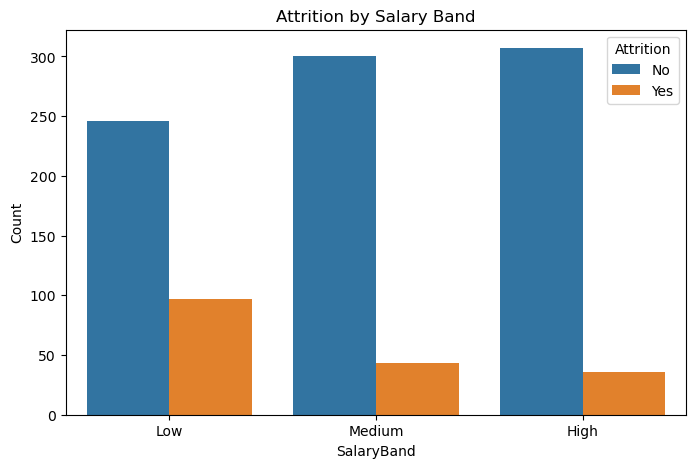

In [138]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='SalaryBand', hue='Attrition')
plt.title('Attrition by Salary Band')
plt.ylabel('Count')
plt.show()

In [139]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,SalaryBand
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.000000,2.0,Medical,1.0,997.0,...,1.0,28.5,1.0,2.0,5.0,4.0,1.0,3.0,Long-term,High
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.000000,2.0,Medical,1.0,178.0,...,2.0,7.0,0.5,3.0,3.0,2.0,0.0,1.0,Mid-term,Medium
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.000000,1.0,Marketing,1.0,1780.0,...,0.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,Short-term,Low
3,50.0,No,Travel_Frequently,1246.0,Human Resources,9.930407,3.0,Medical,1.0,644.0,...,1.0,28.5,2.0,3.0,20.5,5.0,5.0,7.0,Long-term,High
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.000000,4.0,Life Sciences,1.0,1118.0,...,0.0,18.0,4.0,3.0,8.0,6.0,4.0,0.0,Long-term,High


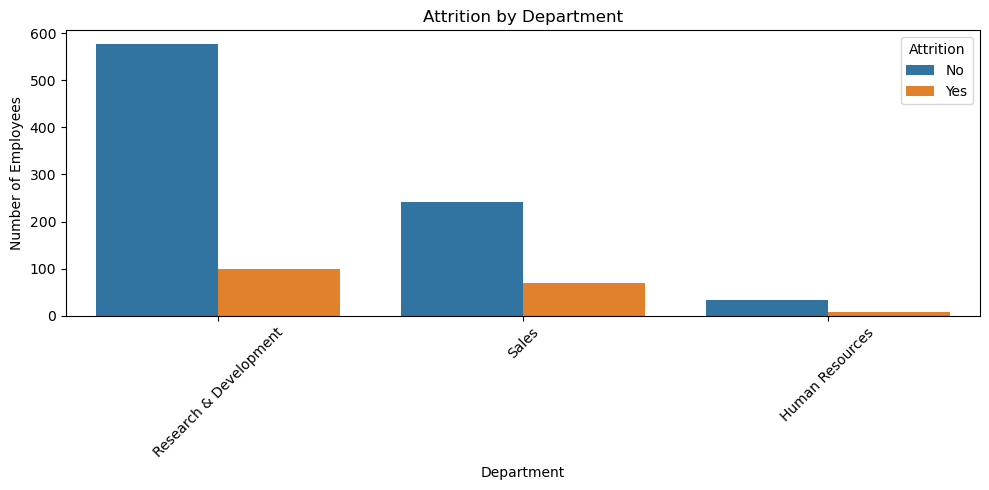

In [140]:
# 1. Countplot: عدد الموظفين حسب القسم وحالة الاستقالة
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_15324\2522092742.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x='Attrition', y='MonthlyIncome', estimator=np.mean, ci=None)


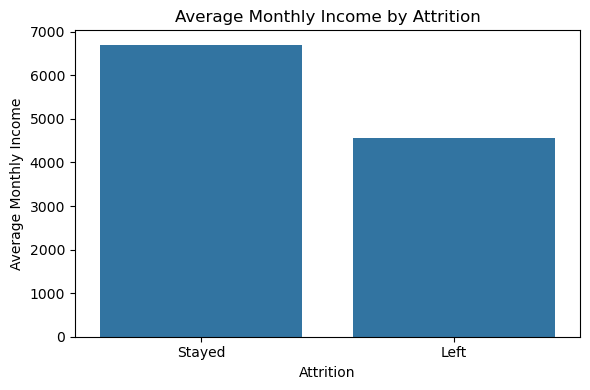

In [141]:
# 4. Barplot: متوسط الراتب الشهري للمستقيلين مقابل غير المستقيلين
plt.figure(figsize=(6, 4))
sns.barplot(data=train_data, x='Attrition', y='MonthlyIncome', estimator=np.mean, ci=None)
plt.title('Average Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Monthly Income')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.tight_layout()
plt.show()

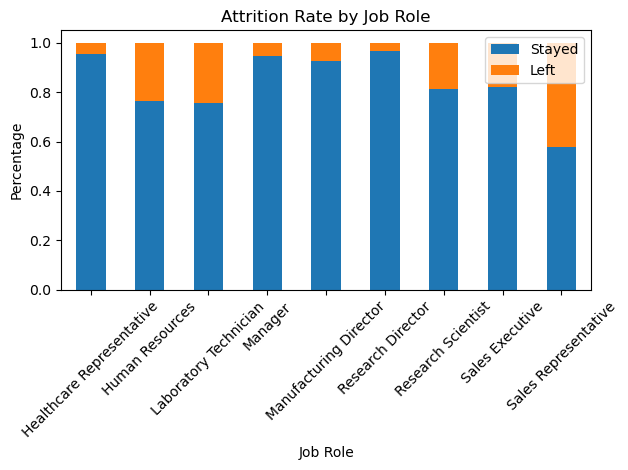

In [142]:
pd.crosstab(train_data['JobRole'], train_data['Attrition'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Job Role')
plt.ylabel('Percentage')
plt.xlabel('Job Role')
plt.legend(['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Average Years at Company by Attrition')

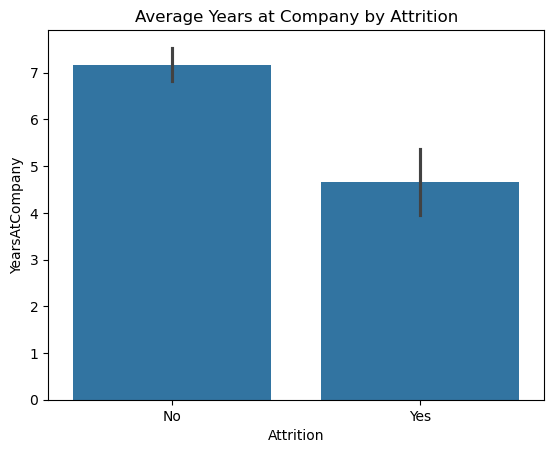

In [143]:
sns.barplot(data=train_data, x='Attrition', y='YearsAtCompany', estimator=np.mean)
plt.title('Average Years at Company by Attrition')


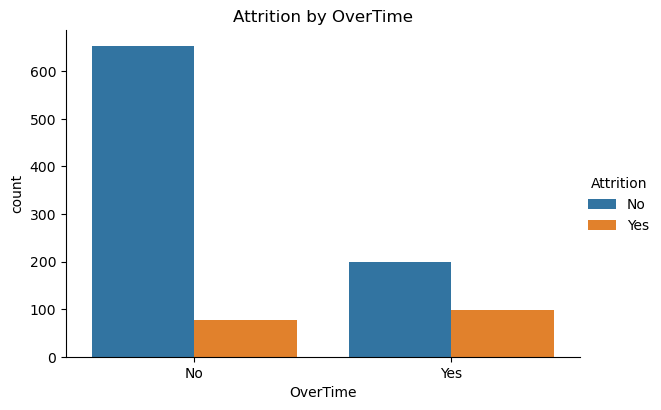

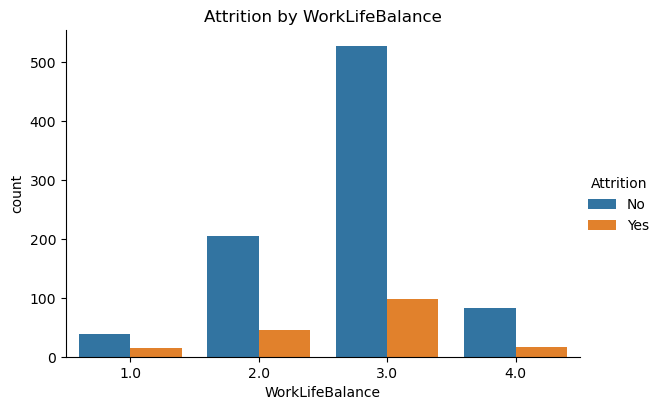

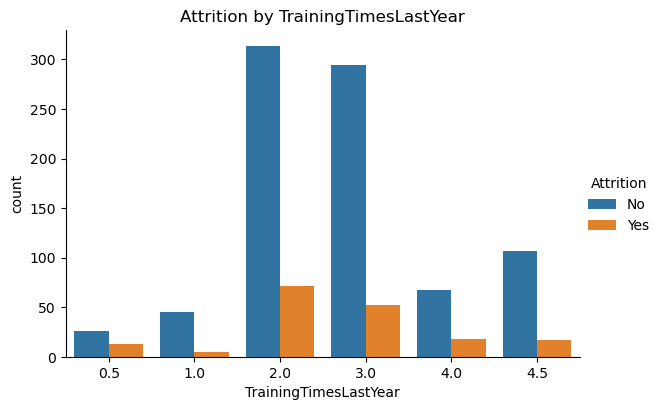

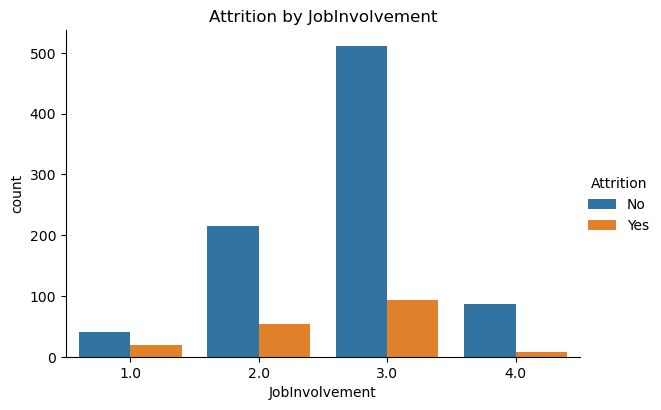

In [144]:
features = ['OverTime', 'WorkLifeBalance', 'TrainingTimesLastYear', 'JobInvolvement']
for feature in features:
    sns.catplot(data=train_data, x=feature, hue='Attrition', kind='count', height=4, aspect=1.5)
    plt.title(f'Attrition by {feature}')


In [145]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.
